# Fastdup Tutorial: Analyze Video

In [ ]:
!pip install -U fastdup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 39.2 MB 1.2 MB/s 


## Download Meva dataset

### Meva dataset - Multi View Extended Video Dataset 
https://mevadata.org/resources/README-meva-kf1-data.html 

Note that we download a small subset as this data does not fit a Colab drive.

In [ ]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 12.0 MB/s 
     |████████████████████████████████| 548 kB 66.2 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 8.9 MB 48.8 MB/s 
     |████████████████████████████████| 138 kB 51.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.8
    Uninstalling rsa-4.8:
      Successfully uninstalled rsa-4.8
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [ ]:
!aws configure # configure your s3 access using your credentials to download the dataset

In [ ]:
!rm -fr meva


In [ ]:
!aws s3 sync s3://mevadata-public-01/examples/videos/ ./meva

download: s3://mevadata-public-01/examples/videos/ex003-close-trunk.mp4 to meva/ex003-close-trunk.mp4
download: s3://mevadata-public-01/examples/videos/ex000-abandon-package.mp4 to meva/ex000-abandon-package.mp4
download: s3://mevadata-public-01/examples/videos/ex002-close-trunk.mp4 to meva/ex002-close-trunk.mp4
download: s3://mevadata-public-01/examples/videos/ex008-embrace-interaction.mp4 to meva/ex008-embrace-interaction.mp4
download: s3://mevadata-public-01/examples/videos/ex001-close-trunk.mp4 to meva/ex001-close-trunk.mp4
download: s3://mevadata-public-01/examples/videos/ex004-close-vehicle-door.mp4 to meva/ex004-close-vehicle-door.mp4
download: s3://mevadata-public-01/examples/videos/ex006-close-vehicle-door.mp4 to meva/ex006-close-vehicle-door.mp4
download: s3://mevadata-public-01/examples/videos/ex010-enter-through-structure.mp4 to meva/ex010-enter-through-structure.mp4
download: s3://mevadata-public-01/examples/videos/ex007-embrace-interaction.mp4 to meva/ex007-embrace-intera

## Run Fastdup to gain insights from video

## Extract feature vectors from Video

Note: video extraction is slow on the free Colab notebook as only 1 core is used. It is recommended to run on a 32 core machine to speed up extraction.

In [ ]:
import fastdup
# run fastdup to extract key frames from video. 
fastdup.run('meva', work_dir='video', run_mode=1)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
On Jupyter notebook running on large datasets, there may be delay getting the console output. We recommend running using python shell.
Going to loop over dir meva
Found total 144 videos to run on
[■                                                 ] 1% Estimated: 0 Minutes
Wrote total of 302 features atrain_2018-03-08.10-05-02.10-10-01.hospital.G301.r13.avi, found 0 bad images
[■                                                 ] 2% Estimated: 8 Minutes
Wrote total of 302 features atrain_2018-03-08.11-10-00.11-15-00.school.G421.r13.avi, found 0 bad images
[■■                                                ] 3% Estimated: 61 Minutes
Wrote total of 302 features atrain_2018-03-08.11-10-02.11-15-02.hospital.G301.r13.avi, found 0 bad images
[■■                                                ] 3% Estimated: 50 Minutes
Wrote total of 302 features atrain_2018-03-08.13-15-02.13-20-02.hospital.G301.r13.avi, found 0 bad imag

## Build nearest neighbor model

In [ ]:
fastdup.run('meva', work_dir='video', run_mode=2)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
On Jupyter notebook running on large datasets, there may be delay getting the console output. We recommend running using python shell.
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 11 features
Read of 10 features
Read of 9 features
Read of 9 features
Read of 9 features
Read of 9 features
Read of 9 features
Read of 15 features
Read of 12 features
Read of 12 features
Read of 9 features
Read of 8 features
Read of 9 features
Read of 11 features
Read of 11 features
Read of 12 feat

## Visualize outliers

In [ ]:
fastdup.create_outliers_gallery('video/outliers.csv', save_path='.', num_images=50)
                                

100%|██████████| 50/50 [00:00<00:00, 99.30it/s] 


Stored outliers visual view in  ./outliers.html



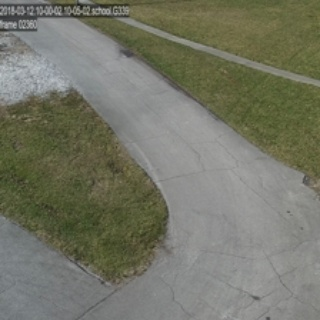
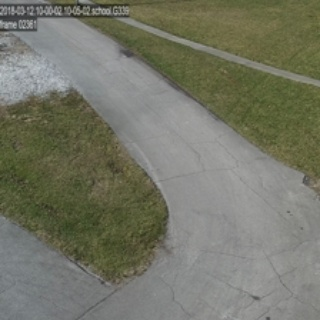
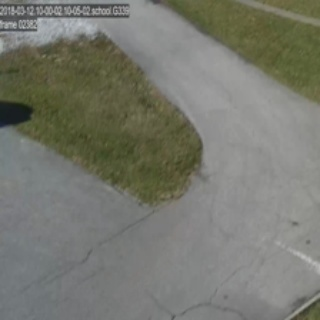
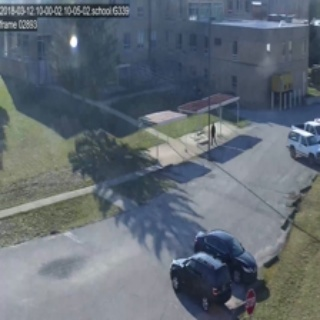
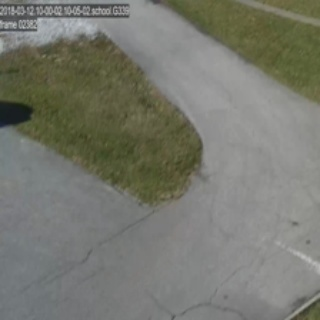
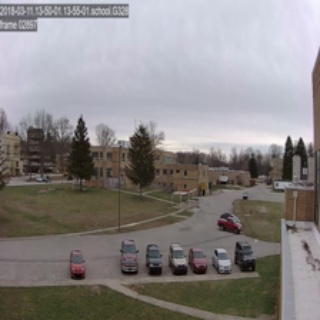
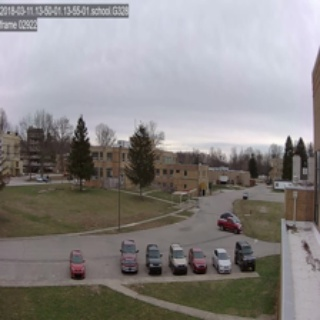
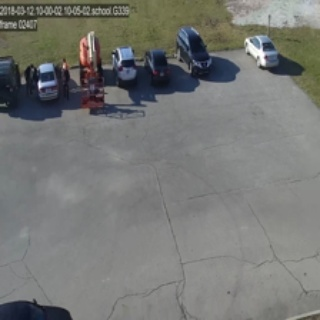
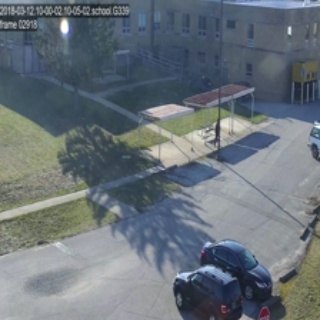
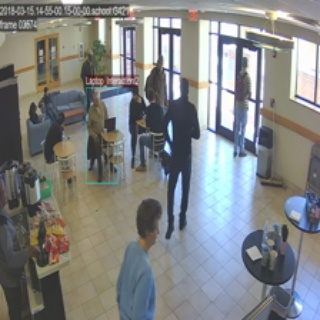
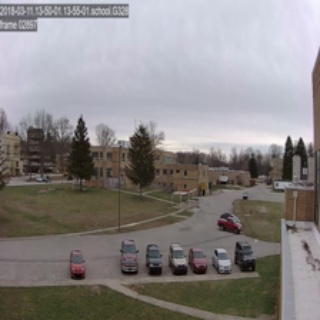
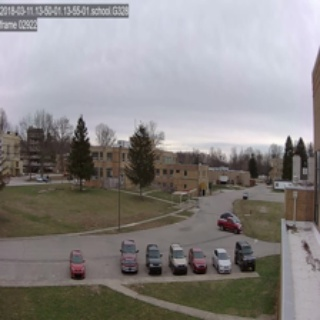
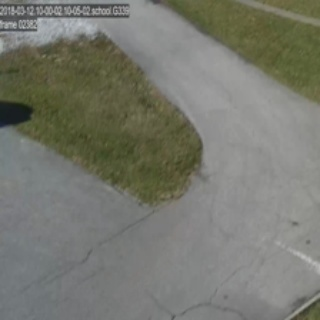
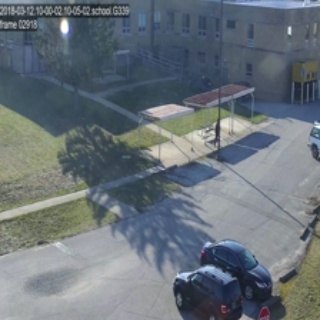
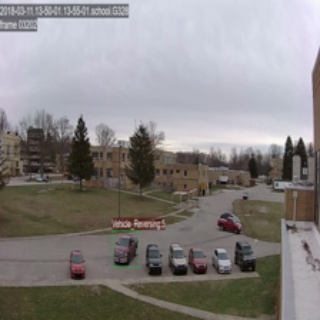
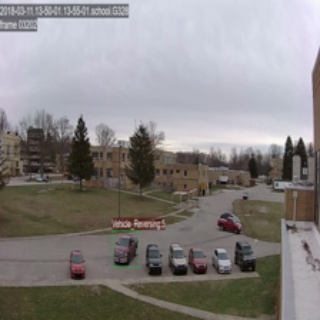
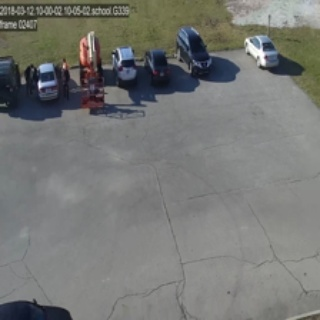
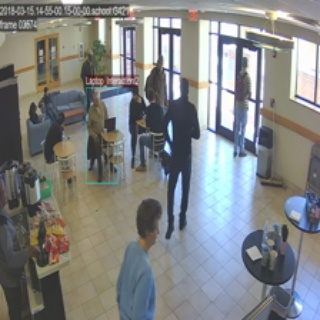
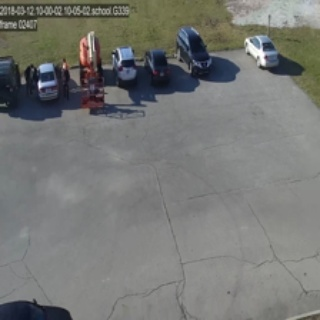
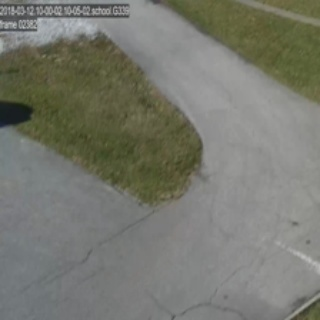
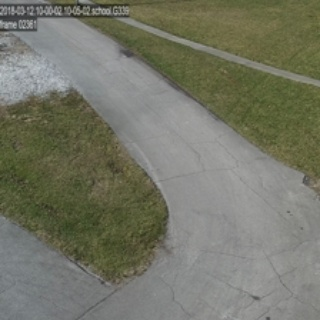
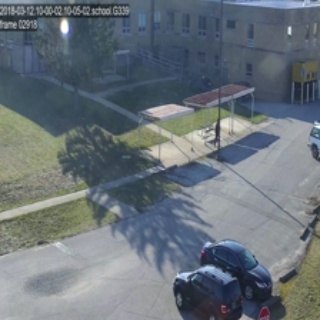
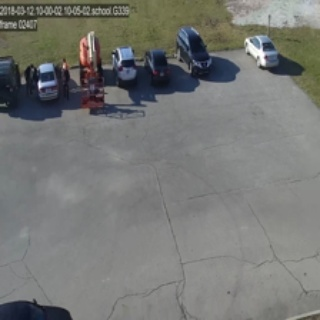
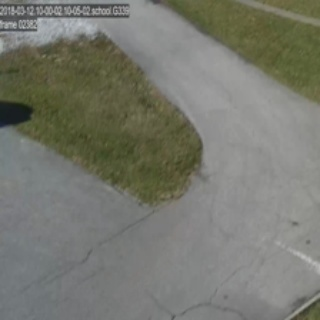
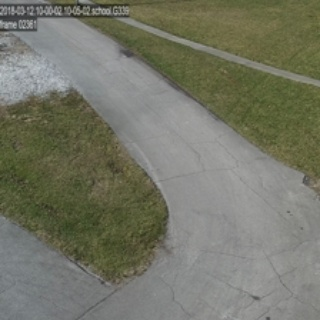
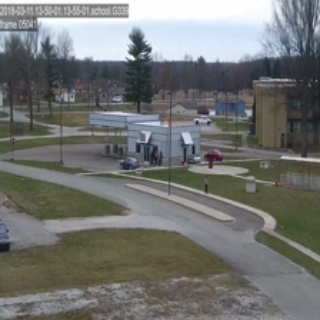
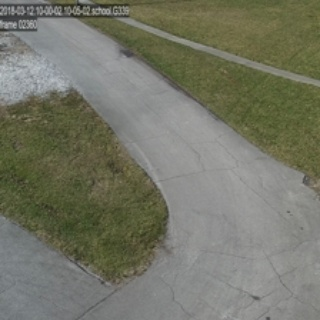
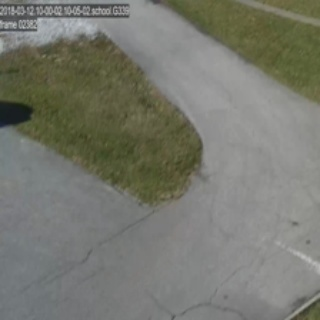
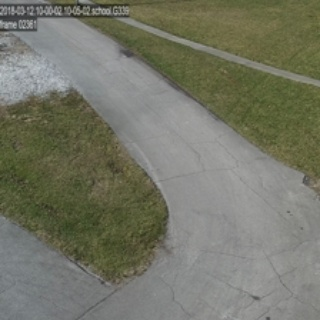
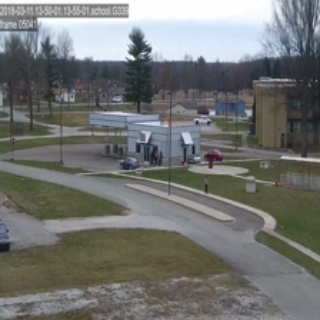
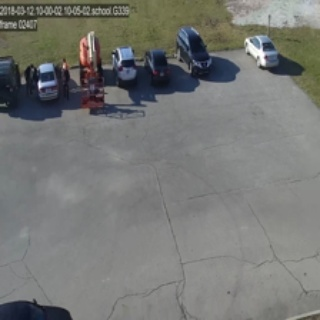
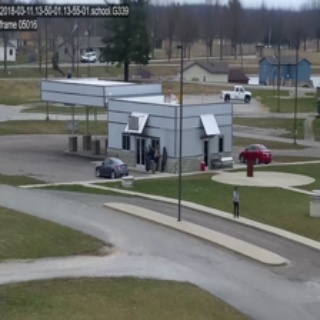
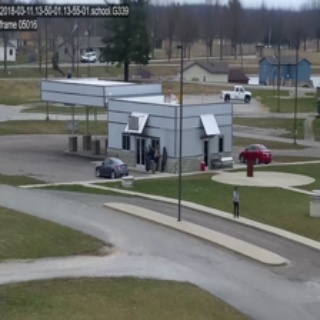
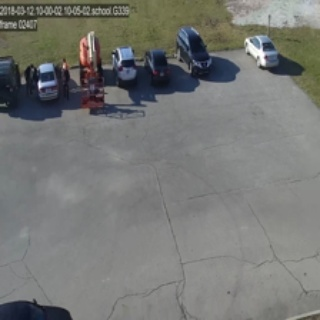
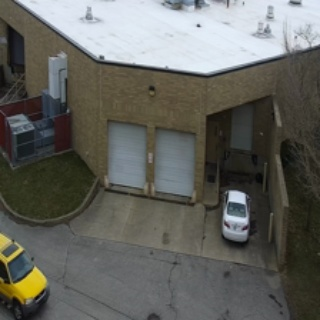
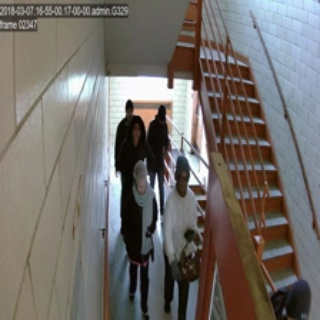
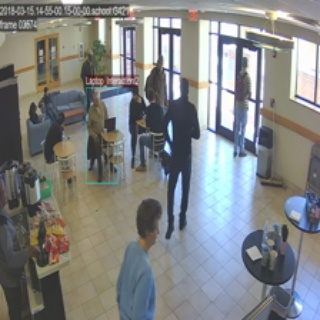
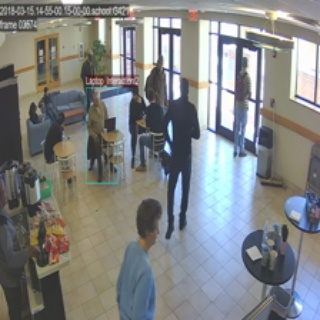
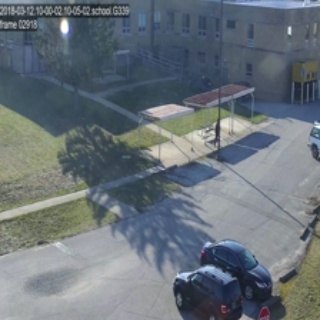
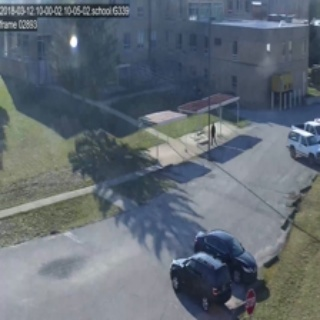
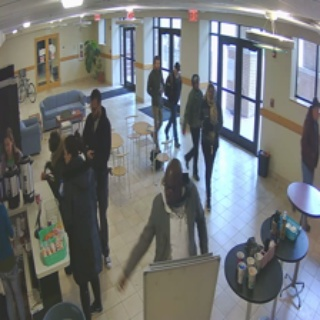
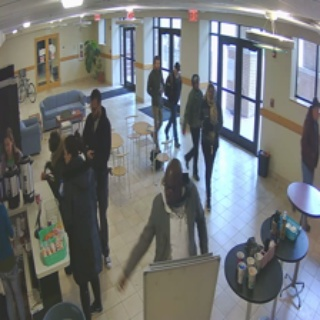
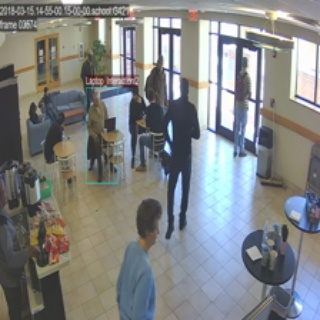
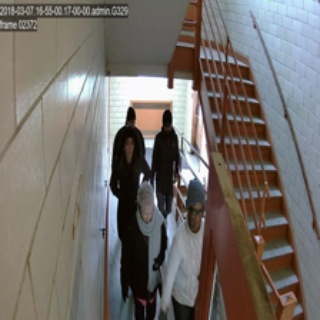
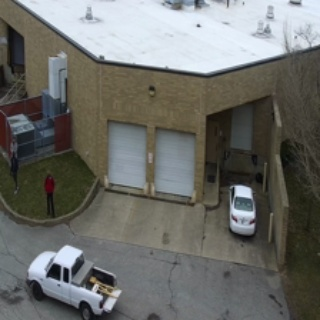
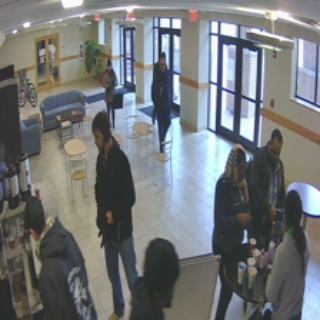
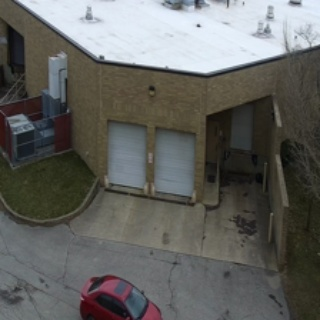
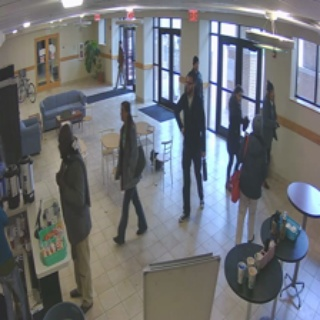
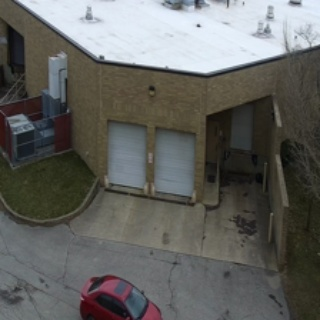
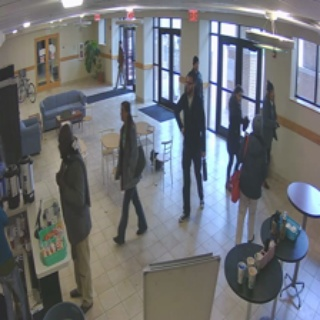

In [ ]:
from IPython.display import HTML
HTML('outliers.html')

## Find similarities across different videos

In [ ]:
import pandas as pd
data = pd.read_csv('video/similarity.csv')

In [ ]:
import os
data['video1'] = data['from'].apply(lambda x: os.path.dirname(x))
data['video2'] = data['to'].apply(lambda x: os.path.dirname(x))
data2 = data[data['video1'] != data['video2']]
data2.tail(20).to_csv('similarity2.csv')

In [ ]:
fastdup.create_duplicates_gallery('similarity2.csv', save_path='.',descending=False)

100%|██████████| 20/20 [00:00<00:00, 68.50it/s]


Stored similarity visual view in  ./similarity.html



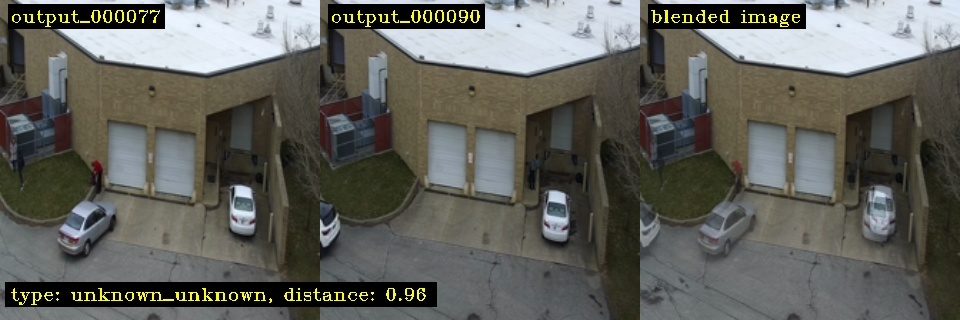
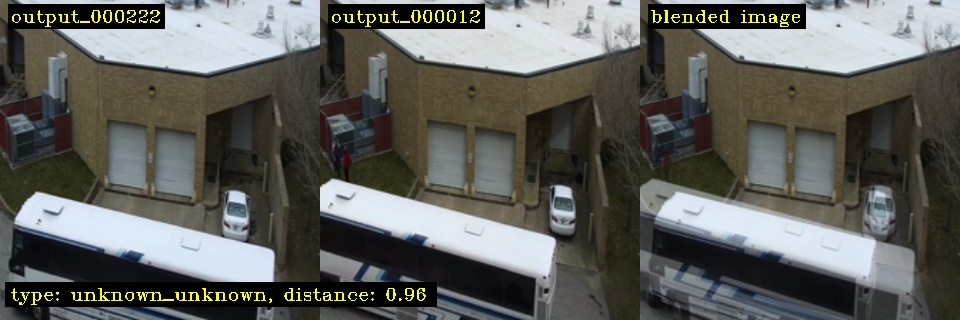
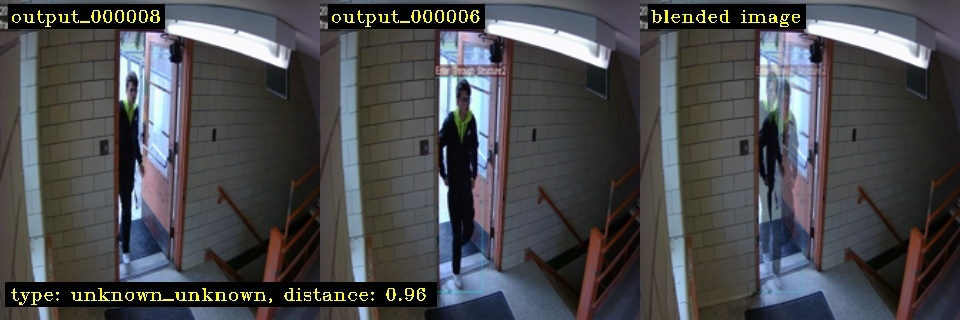
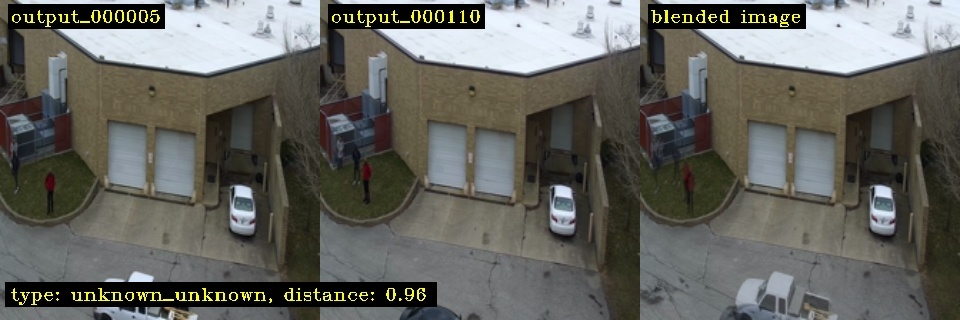
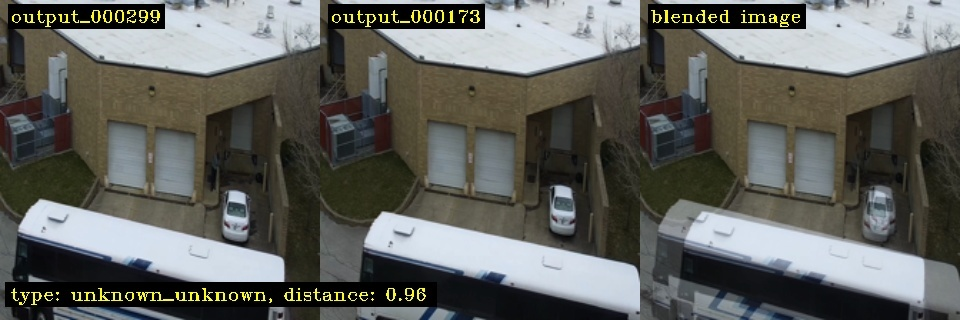
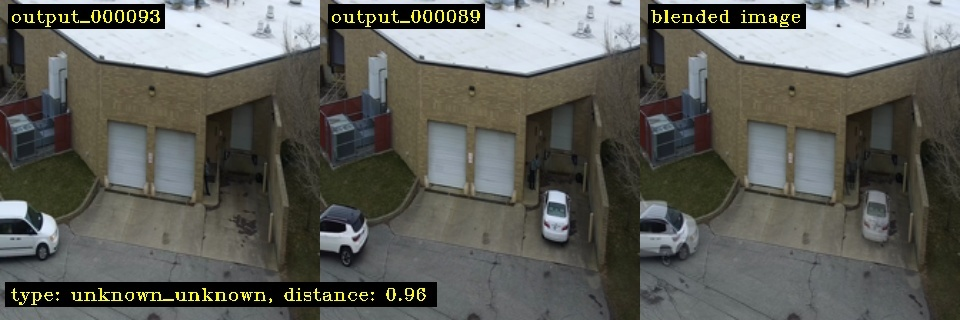
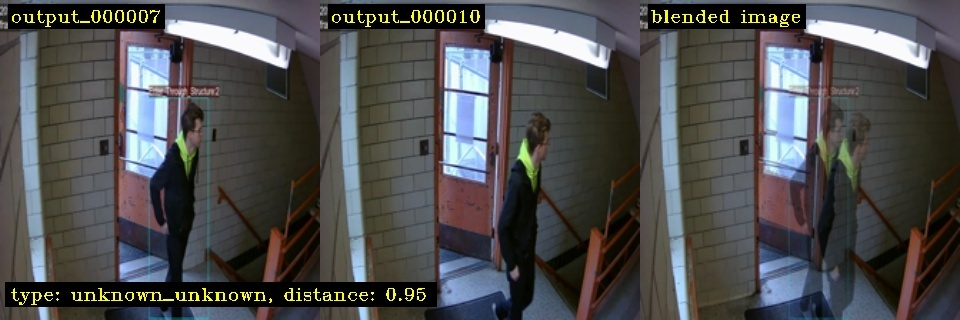
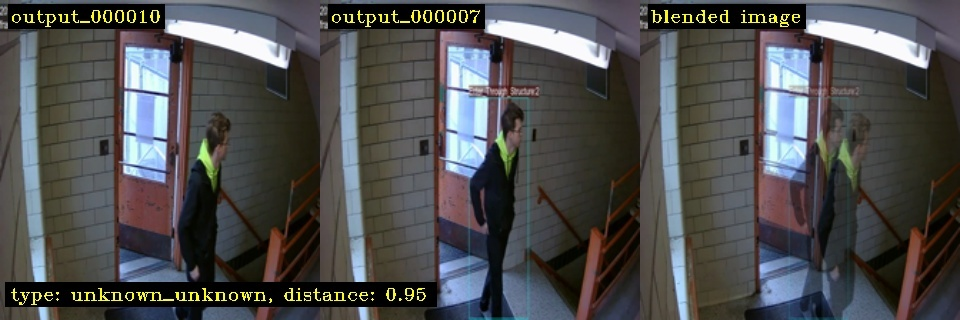
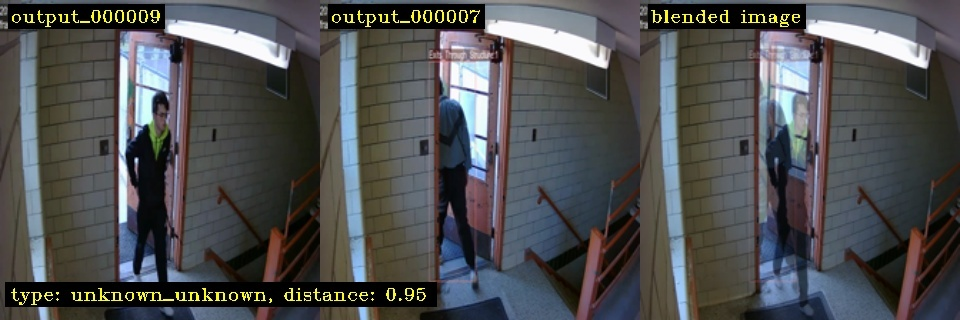
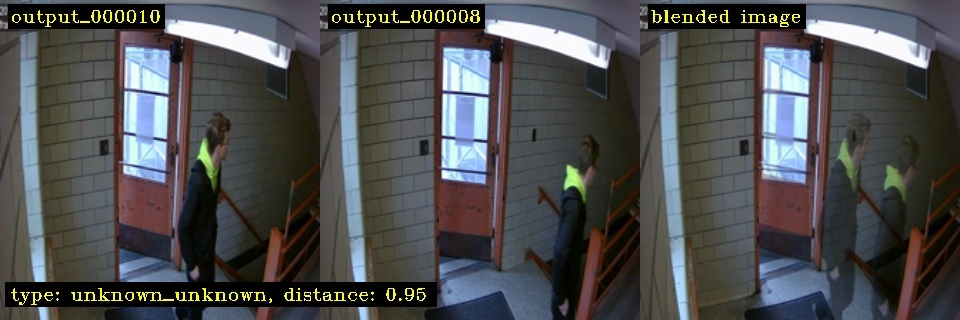
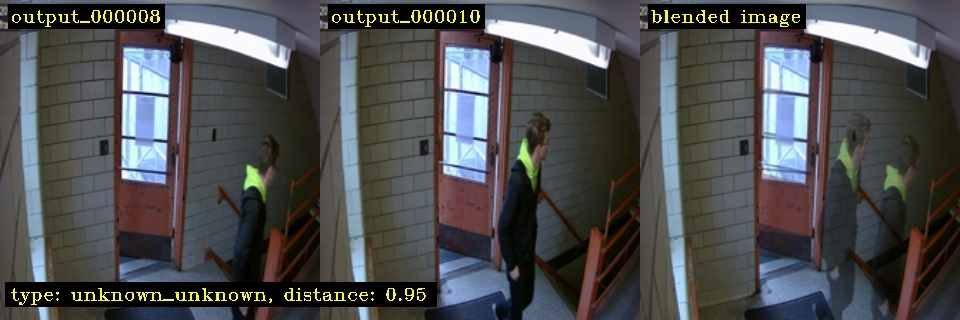
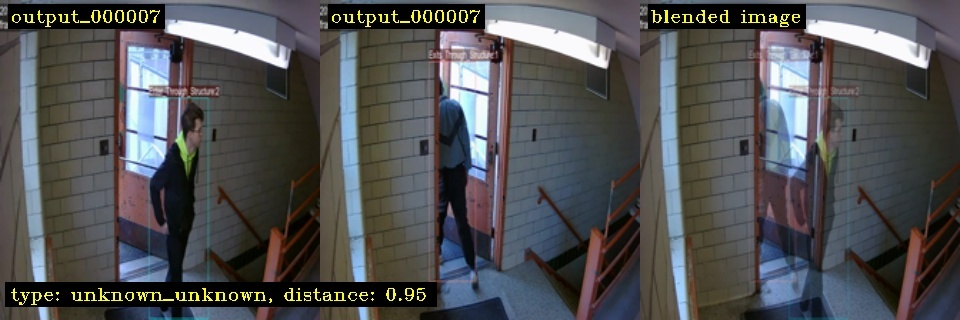
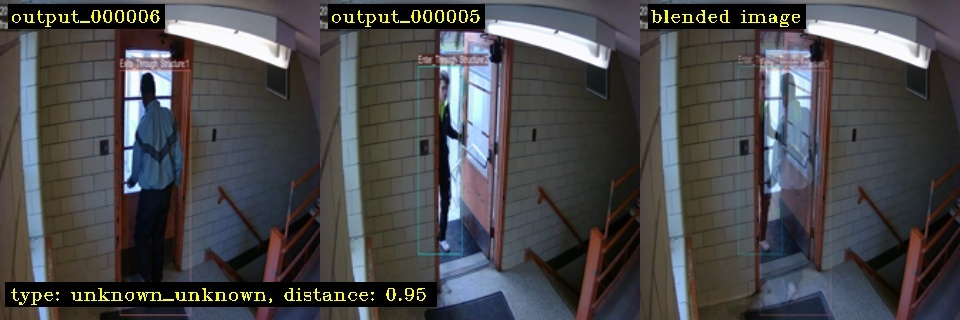
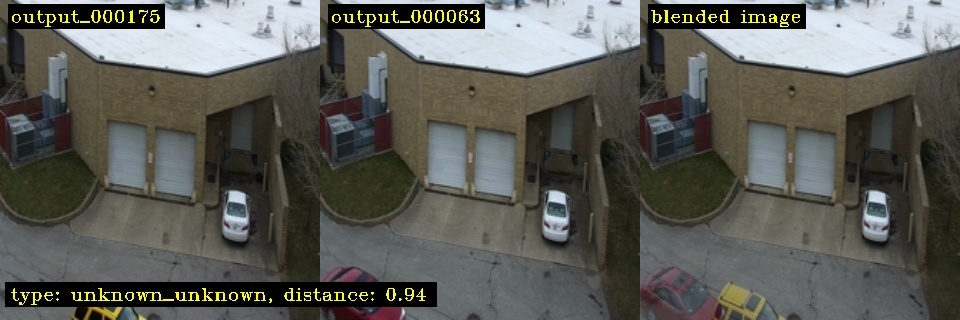
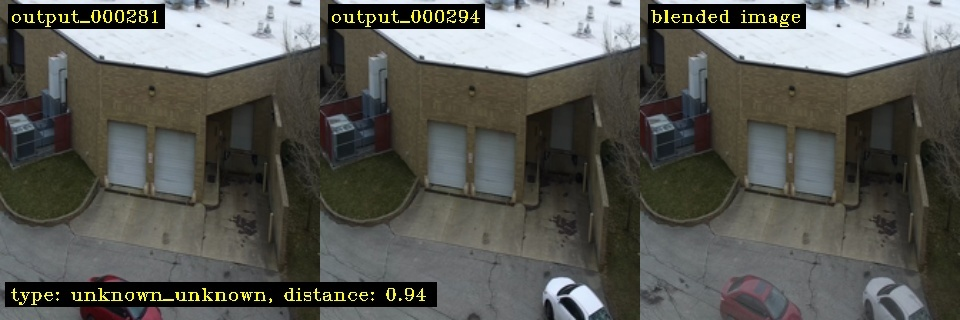
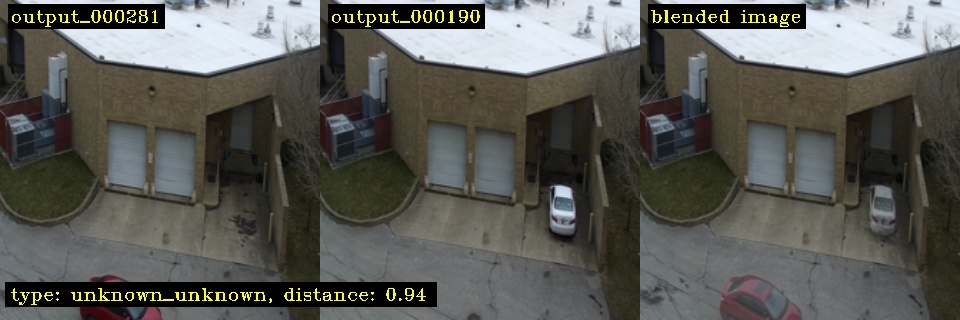
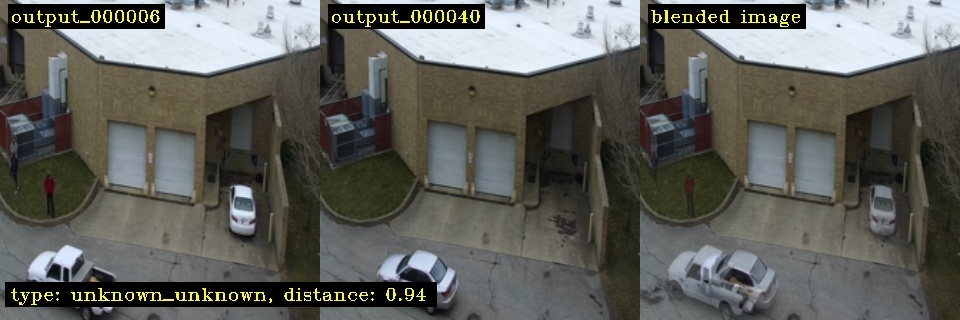
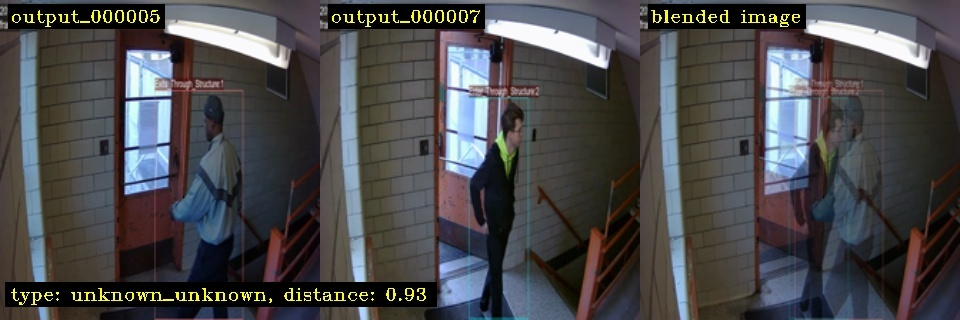
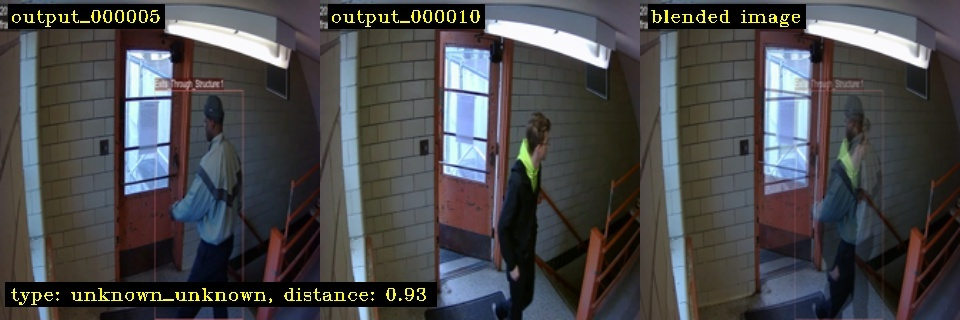
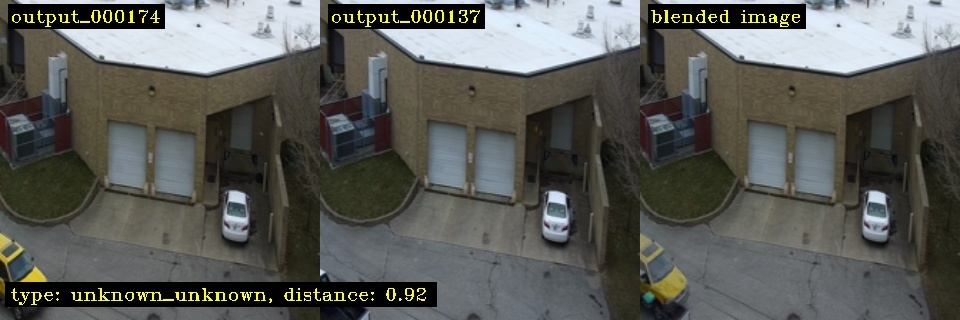

In [ ]:
HTML('similarity.html')